In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
pd.options.mode.chained_assignment = None  # default='warn'

METADATA = {'Contributor': 'T. Dunn'}
FSIZE = [5,4]
FDPI = 100
SAVEFIGS = False

df0 = pd.read_csv('monster-categories.csv')
print('Includes {} monsters in database'.format(len(df0.index.to_list())))

Includes 1473 monsters in database


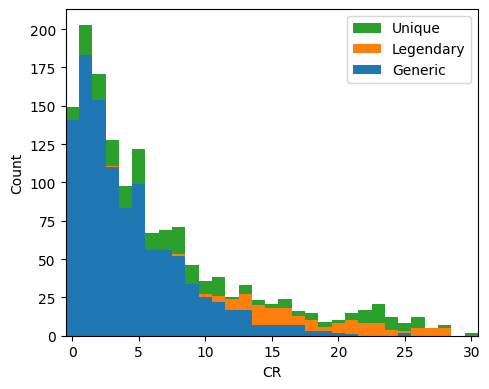

In [2]:
# number of monsters by CR
rMin = 0; rMax = 30; rDel = 1.0
rLims = [rMin - rDel/2, rMax + rDel/2]
rRange = np.linspace(rMin - rDel/2, rMax + rDel/2, int(round((rMax - rMin)/rDel)) + 2)

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes(xlim=rLims, xlabel='CR', ylabel='Count')

ax.hist((
    df0[df0['Category'].isin(['generic'])]['CR'],
    df0[df0['Category'].isin(['legendary'])]['CR'],
    df0[df0['Category'].isin(['unique'])]['CR']), 
    rRange, density=False, histtype='stepfilled', stacked=True, label=['Generic','Legendary','Unique'])
ax.legend()

if SAVEFIGS: plt.savefig('monster-distribution.svg', metadata=METADATA)

In [3]:
# summarize the current dataset
df1 = df0[df0['CR'].between(1,30)]
dfG = df1.groupby(['Book','Book Type','Date']).size().to_frame('Total')
dfG['N'] = df1[df1['Legendary'].isin(['N'])].groupby(['Book','Book Type','Date']).size().to_frame('Count')
dfG['L'] = df1[df1['Legendary'].isin(['L','LL'])].groupby(['Book','Book Type','Date']).size().to_frame('Count')
dfG = dfG[dfG['Total'].gt(0)]
dfG = dfG.sort_values(by=['Date'])
dfG = dfG.reset_index()
dfG = dfG[['Book','Date','Total']]

nMid = np.floor(0.5*dfG.shape[0])

dfG1 = dfG.loc[0:nMid, ['Book','Date','Total']].reset_index()
dfG2 = dfG.loc[nMid+1:, ['Book','Date','Total']].reset_index()
dfC = pd.concat([dfG1,dfG2], axis=1)
dfC.drop(columns=['index'], inplace=True)
dfC.to_html('./monsters-by-book.html', index=False, classes='center', float_format='{:,.0f}'.format, border=0, na_rep='')